# title
## major headings
### sub-headings
#### 4th level sub-headings
**bolded text** *italic*

In [2]:
# https://www.tensorflow.org/tutorials/keras/basic_classification

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [11]:
#Fashion MNIST is intended as a drop-in replacement for the
#classic MNIST dataset—often used as the "Hello, World" of
#machine learning programs for computer vision. 
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Each image is mapped to a single label. Since the class names
# are not included with the dataset, store them here to use later
# when plotting the images:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [12]:
# Exploring the dataset
# Only the last line printed
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

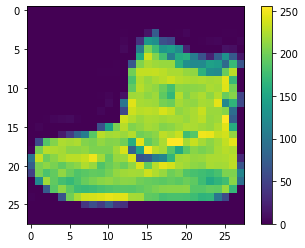

In [13]:
# The data must be preprocessed before training the network.
# If you inspect the first image in the training set, you will
# see that the pixel values fall in the range of 0 to 255:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

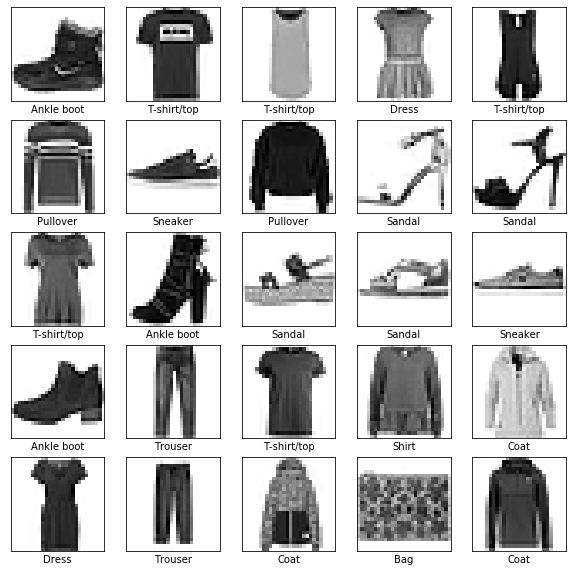

In [14]:
# The values have to be scalled to a range of 0 - 1 before being
# fed to the NN model. This is done by dividing by 255.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Next, we display the first 25 images from the training set and
# verify that the data is in the correct format.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the Classification model using keras

In [16]:
# Setting up the layers
# Flatten transforms a 2d image into a 1d array (unstack into long string)
# Dense = fully connected neural layers (so a 128 node followed by 10 node)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compiling the model so its ready for training.
# Basically adding the Loss function, Optimizer and Metrics.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model
# the model learns to associate train_images with train_labels
# epoch here basically is a "run"
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4961 - acc: 0.8269
Epoch 2/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3739 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3401 - acc: 0.8749
Epoch 4/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3144 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2962 - acc: 0.8910


In [17]:
# Evaluating Accuracy
# After training the mode, we evaluate its accuracy on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# The gap between train-test (89-86) could indicate overfitting. 

10000/10000 [==============================] - 1s 57us/sample - loss: 0.3762 - acc: 0.8613
Test accuracy: 0.8613


In [18]:
# With model trained, we can make predictions about some images
predictions = model.predict(test_images)
predictions[0] # look at the first prediction
# the array of 10 numbers corresponds to the 10 classes of clothing

# np.argmax(predictions[0]) # most confident should be class 9 (ankle boot)
# test_labels[0] # also 9

array([1.08488144e-04, 1.91492836e-06, 2.55015834e-06, 9.55429277e-06,
       1.01139667e-05, 2.71845814e-02, 2.88752472e-05, 7.16208741e-02,
       1.70166924e-04, 9.00862873e-01], dtype=float32)

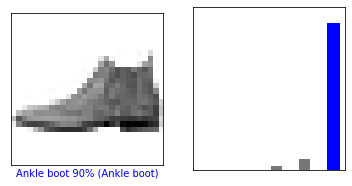

In [20]:
# defining the functions to graph the predictions.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    
# Examining the '0'th image and its predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

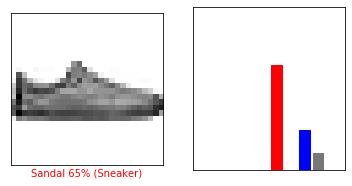

In [21]:
# and again but this time on the 12th image in the dataset
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

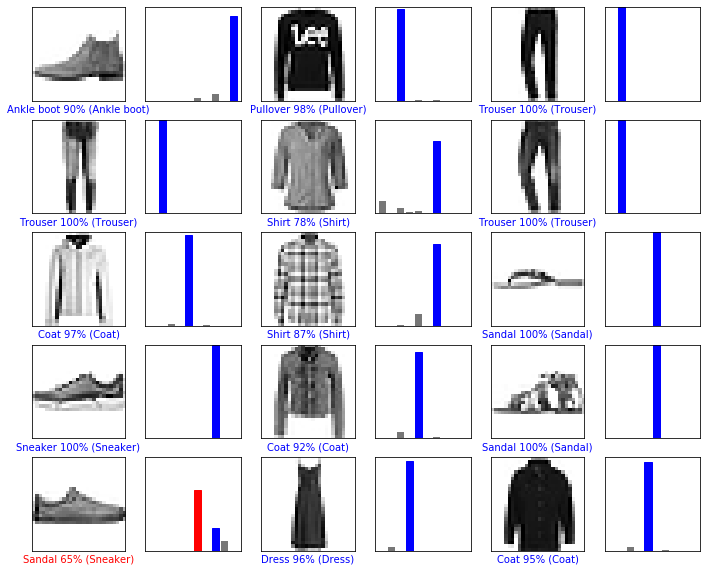

In [22]:
# and again but this time with more images in a grid
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(1, 28, 28)
[[1.0848813e-04 1.9149300e-06 2.5501627e-06 9.5542910e-06 1.0113966e-05
  2.7184606e-02 2.8875274e-05 7.1620904e-02 1.7016674e-04 9.0086275e-01]]


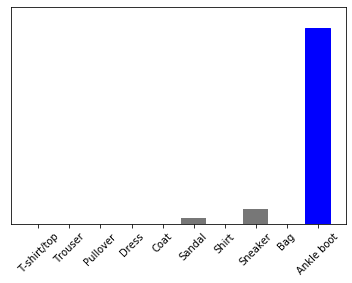

9


In [27]:
# Here we use the trained model to make a prediction about a single image

# Grab an image from the test dataset
img = test_images[0]
# Add it to a batch where it is the only member (only 1 image in set)
img = (np.expand_dims(img,0))
print(img.shape) #should get (1,28,28) for 1,H,W

# Then predict the iamge
predictions_single = model.predict(img)
print(predictions_single) # prints the 10 value arrray
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show() # prints the chart
# predicts the class index (9)
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)